<a href="https://colab.research.google.com/github/justin66744/beats-customer-insights-project/blob/main/Visualizations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Saving final_dataset.csv to final_dataset (1).csv


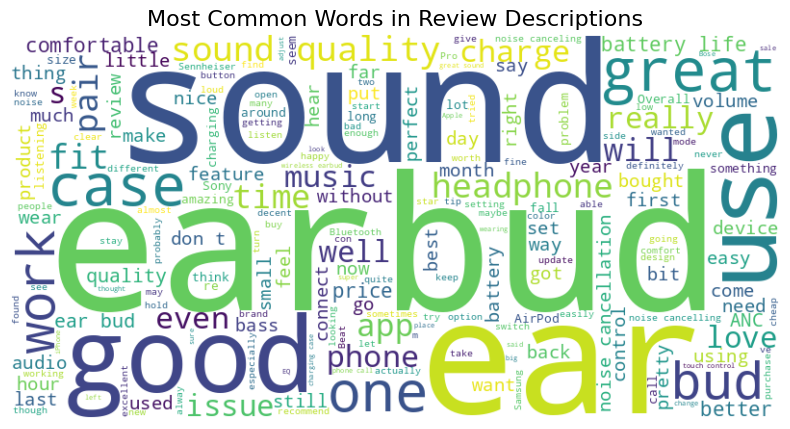

In [10]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import pandas as pd
from google.colab import files
uploaded = files.upload()

df = pd.read_csv('final_dataset.csv')

text = " ".join(review for review in df['content'].dropna())
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Most Common Words in Review Descriptions", fontsize=16)
plt.show()

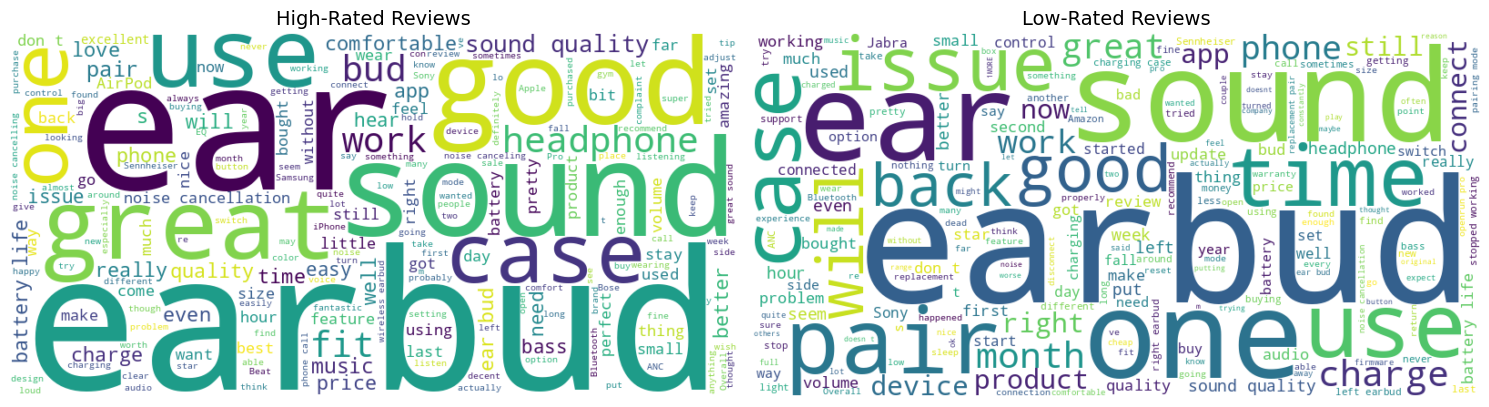

In [2]:
high_rated = " ".join(review for review in df[df['rating'] >= 4]['content'].dropna())
low_rated = " ".join(review for review in df[df['rating'] <= 2]['content'].dropna())

high_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(high_rated)

low_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(low_rated)

fig, axs = plt.subplots(1, 2, figsize=(15, 7))
axs[0].imshow(high_wordcloud, interpolation='bilinear')
axs[0].axis('off')
axs[0].set_title("High-Rated Reviews", fontsize=14)

axs[1].imshow(low_wordcloud, interpolation='bilinear')
axs[1].axis('off')
axs[1].set_title("Low-Rated Reviews", fontsize=14)

plt.tight_layout()
plt.show()

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
/tmp/ipython-input-2559596184.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Count', y='Word', data=common_words_df, palette='viridis')


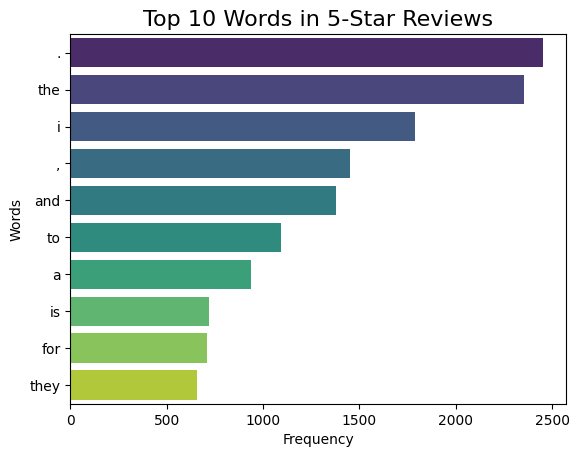

In [3]:
from collections import Counter
import seaborn as sns
from nltk.tokenize import word_tokenize
import nltk
nltk.download('punkt_tab')

five_star_reviews = " ".join(review for review in df[df['rating'] == 5]['content'].dropna())
tokens = word_tokenize(five_star_reviews.lower())

common_words = Counter(tokens).most_common(10)
common_words_df = pd.DataFrame(common_words, columns=['Word', 'Count'])

sns.barplot(x='Count', y='Word', data=common_words_df, palette='viridis')
plt.title("Top 10 Words in 5-Star Reviews", fontsize=16)
plt.xlabel("Frequency")
plt.ylabel("Words")
plt.show()

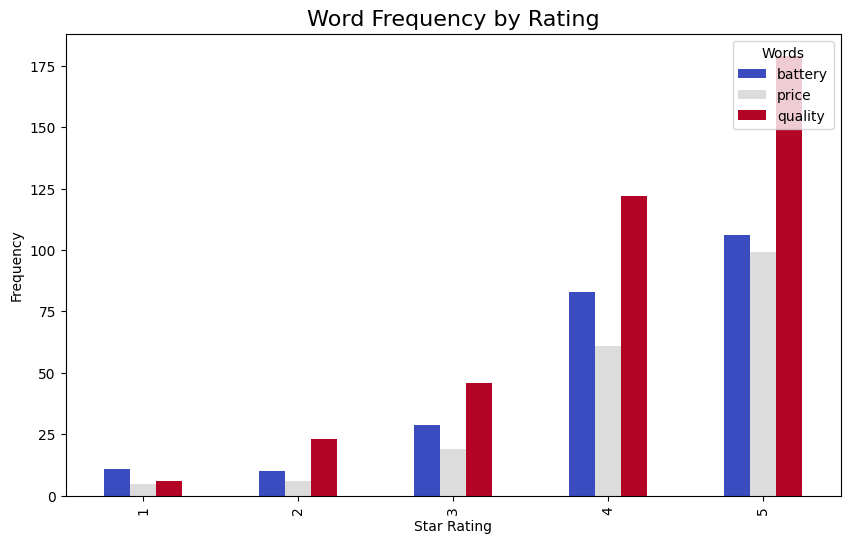

In [4]:
words_to_compare = ['battery', 'price', 'quality']
word_freq_by_rating = {word: df[df['content'].str.contains(word, case=False, na=False)]['rating'].value_counts() for word in words_to_compare}
freq_df = pd.DataFrame(word_freq_by_rating).fillna(0)

freq_df.plot(kind='bar', figsize=(10, 6), colormap='coolwarm')
plt.title("Word Frequency by Rating", fontsize=16)
plt.xlabel("Star Rating")
plt.ylabel("Frequency")
plt.legend(title="Words", loc='upper right')
plt.show()


/tmp/ipython-input-772517307.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='brand', y='rating', data=avg_rating, palette='muted')


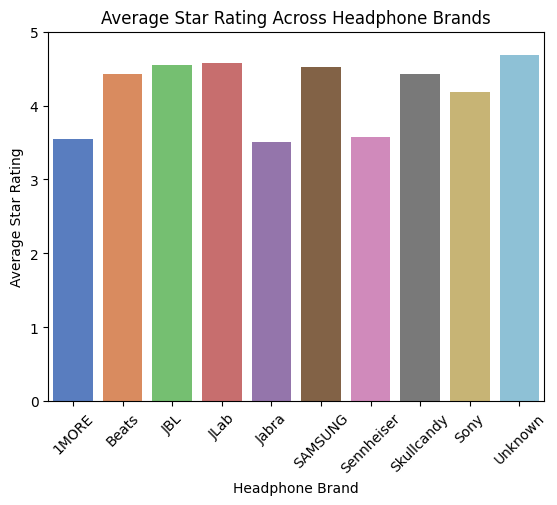

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

avg_rating = df.groupby('brand')['rating'].mean().reset_index()

sns.barplot(x='brand', y='rating', data=avg_rating, palette='muted')
plt.title("Average Star Rating Across Headphone Brands")
plt.xlabel("Headphone Brand")
plt.ylabel("Average Star Rating")
plt.xticks(rotation=45)
plt.ylim(0, 5)
plt.show()

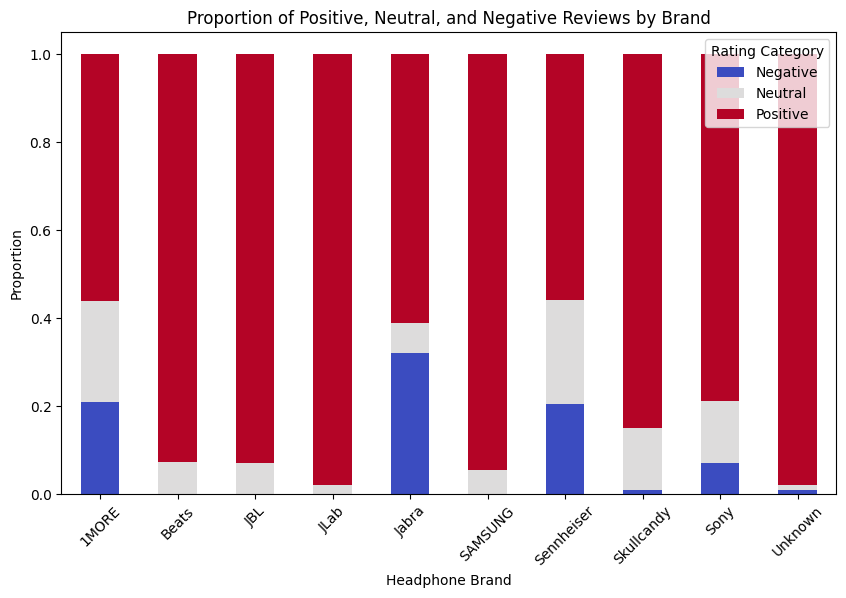

In [13]:
def categorize_rating(stars):
    if stars >= 4:
        return 'Positive'
    elif stars == 3:
        return 'Neutral'
    else:
        return 'Negative'

df['Rating Category'] = df['rating'].apply(categorize_rating)

rating_proportions = df.groupby(['brand', 'Rating Category']).size().unstack(fill_value=0)
rating_proportions = rating_proportions.div(rating_proportions.sum(axis=1), axis=0)

rating_proportions.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='coolwarm')
plt.title("Proportion of Positive, Neutral, and Negative Reviews by Brand")
plt.xlabel("Headphone Brand")
plt.ylabel("Proportion")
plt.legend(title="Rating Category", loc="upper right")
plt.xticks(rotation=45)
plt.show()


/tmp/ipython-input-290360095.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='brand', y='rating', data=df, palette='Set3')


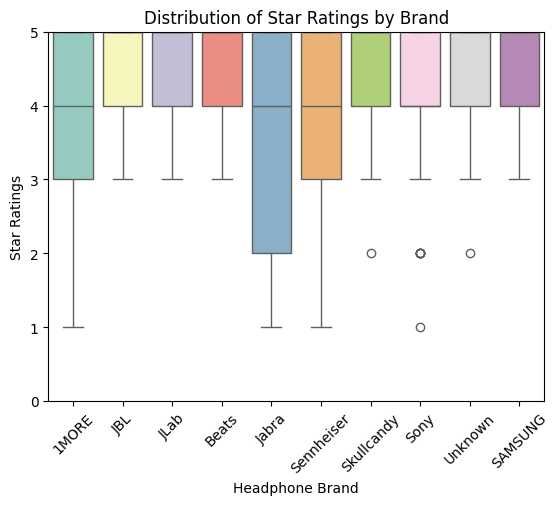

In [14]:
sns.boxplot(x='brand', y='rating', data=df, palette='Set3')
plt.title("Distribution of Star Ratings by Brand")
plt.xlabel("Headphone Brand")
plt.ylabel("Star Ratings")
plt.xticks(rotation=45)
plt.ylim(0, 5)
plt.show()


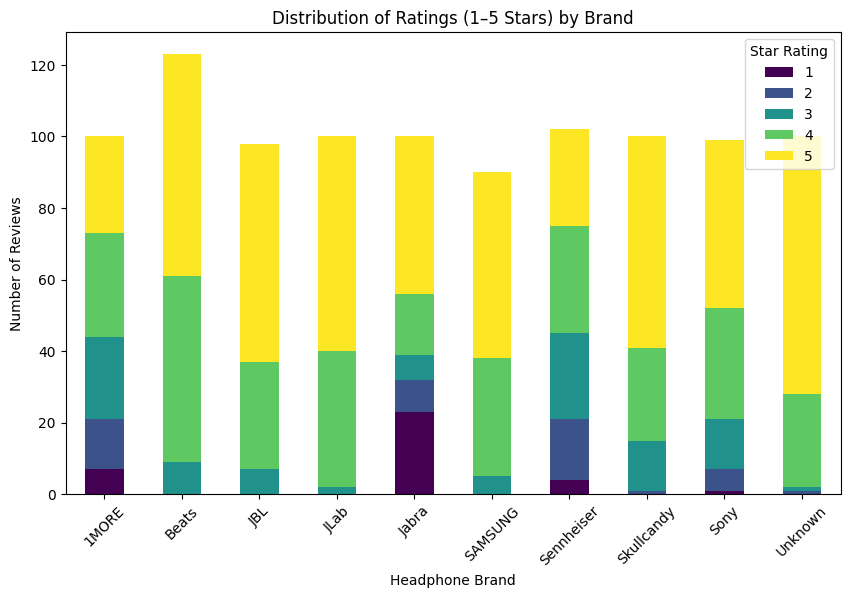

In [15]:
rating_counts = df.groupby(['brand', 'rating']).size().unstack(fill_value=0)
rating_counts.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='viridis')

plt.title("Distribution of Ratings (1–5 Stars) by Brand")
plt.xlabel("Headphone Brand")
plt.ylabel("Number of Reviews")
plt.xticks(rotation=45)
plt.legend(title="Star Rating", loc="upper right")
plt.show()


/tmp/ipython-input-1033837551.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='brand', y='rating', data=avg_rating, palette="muted")


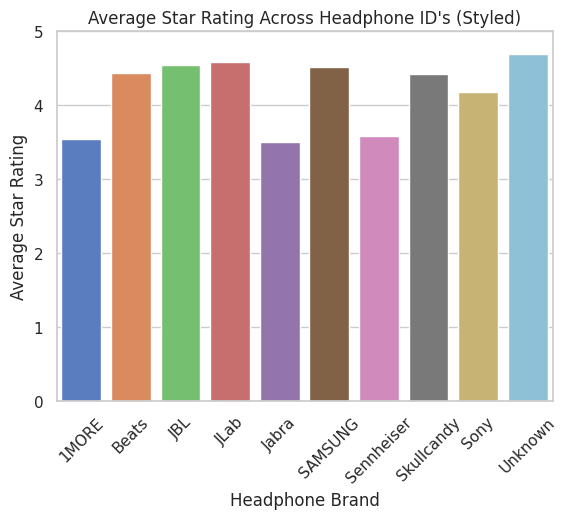

In [16]:
import seaborn as sns

sns.set_theme(style="whitegrid", palette="pastel")

sns.barplot(x='brand', y='rating', data=avg_rating, palette="muted")
plt.title("Average Star Rating Across Headphone ID's (Styled)")
plt.xlabel("Headphone Brand")
plt.ylabel("Average Star Rating")
plt.xticks(rotation=45)
plt.ylim(0, 5)
plt.show()